In [80]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_1 = [
    "c:\\Users\\anany\\Downloads\\00000349-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[007].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[008].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[009].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[010].edf"
]

edf_files_2 = [
    "C:\\Users\\anany\\Downloads\\00000344-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[008].edf"
]

edf_files_3 = [
    "C:\\Users\\anany\\Downloads\\00000338-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[011].edf"
]

edf_files_4 = [
    "C:\\Users\\anany\\Downloads\\00000336-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[011].edf"
]

labels = signal_labels(edf_files_1[0])
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
print(labels)

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A1', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow patient 1', 'Flow patient 2', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow patient 3', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [81]:
def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold):
    mean = signal.mean()
    std = np.std(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, mean)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

def mean_of_interval(signal, start, end):
    return stat.mean(signal[start:end])

# USER STAGING 349

In [82]:
import xml.etree.ElementTree as ET

# Function to parse the XML and print stages
file_path = 'C:\\Users\\anany\\Desktop\\SEM5\\DH307\\OSA\\user.rml'
    # Parse the XML file
tree = ET.parse(file_path)
root = tree.getroot()

# Iterate through each Stage element in the XML
for stage in root.findall('.//User/Stage'):
    stage_type = stage.get('Type')  # Get the 'Type' attribute
    start_time = stage.get('Start')  # Get the 'Start' attribute
    
    # Print the stage type and start time
    print(f'Stage Type: {stage_type}, Start: {start_time}')

Stage Type: Wake, Start: 0
Stage Type: NonREM1, Start: 360
Stage Type: Wake, Start: 600
Stage Type: NonREM1, Start: 750
Stage Type: NonREM2, Start: 1200
Stage Type: NonREM3, Start: 2580
Stage Type: NonREM2, Start: 4050
Stage Type: NonREM3, Start: 4260
Stage Type: NonREM2, Start: 4830
Stage Type: NonREM3, Start: 5010
Stage Type: NonREM2, Start: 5340
Stage Type: NonREM3, Start: 5820
Stage Type: REM, Start: 6180
Stage Type: NonREM2, Start: 7080
Stage Type: NonREM3, Start: 8250
Stage Type: NonREM2, Start: 8940
Stage Type: NonREM3, Start: 9630
Stage Type: NonREM1, Start: 10050
Stage Type: NonREM2, Start: 10230
Stage Type: Wake, Start: 11130
Stage Type: NonREM1, Start: 11670
Stage Type: NonREM2, Start: 11940
Stage Type: NonREM1, Start: 12180
Stage Type: NonREM2, Start: 12240
Stage Type: NonREM3, Start: 12360
Stage Type: NonREM2, Start: 12420
Stage Type: NonREM3, Start: 12690
Stage Type: NonREM2, Start: 12780
Stage Type: NonREM3, Start: 12810
Stage Type: NonREM2, Start: 12960
Stage Type: NonR

In [83]:
def find_intervals_user(type, root):
    time_intervals = []
    time_pair = []
    for stage in root.findall('.//User/Stage'):
        stage_type = stage.get('Type')
        start_time = int(stage.get('Start'))

        if stage_type == type:
            if len(time_pair) == 0:
                time_pair.append(start_time)
        else:
            if len(time_pair) == 1:
                time_pair.append(start_time)
                time_intervals.append(time_pair)
                time_pair = []

    return time_intervals

In [84]:
user_wake_times = find_intervals_user('Wake', root)
print(user_wake_times)
user_nrem1_times = find_intervals_user('NonREM1', root)
print(user_nrem1_times)
user_nrem2_times = find_intervals_user('NonREM2', root) 
user_nrem2_times.append([34470, 34608])
print(user_nrem2_times)
user_nrem3_times = find_intervals_user('NonREM3', root)
print(user_nrem3_times)
user_rem_times = find_intervals_user('REM', root)
print(user_rem_times)

[[0, 360], [600, 750], [11130, 11670], [19260, 19320], [20190, 20250], [21060, 21090], [22410, 22470], [23040, 23070], [24600, 24690], [26310, 26400], [27180, 27300], [30390, 30450], [32250, 32310]]
[[360, 600], [750, 1200], [10050, 10230], [11670, 11940], [12180, 12240], [19230, 19260], [19320, 19470], [25200, 25290], [26280, 26310], [26400, 26550], [26910, 27030], [27300, 27450], [30450, 30540], [33060, 33090], [33360, 33510], [33900, 33990], [34320, 34470]]
[[1200, 2580], [4050, 4260], [4830, 5010], [5340, 5820], [7080, 8250], [8940, 9630], [10230, 11130], [11940, 12180], [12240, 12360], [12420, 12690], [12780, 12810], [12960, 13080], [19470, 19560], [20250, 20340], [21090, 21150], [24360, 24600], [24690, 24750], [26550, 26910], [27030, 27180], [27450, 27810], [30540, 30840], [32880, 33060], [33270, 33360], [33510, 33690], [33990, 34320], [34470, 34608]]
[[2580, 4050], [4260, 4830], [5010, 5340], [5820, 6180], [8250, 8940], [9630, 10050], [12360, 12420], [12690, 12780], [12810, 1296

In [85]:
#WAKE USER
mean_user_wake_dict = {}

for i in range(len(labels)):
    mean_user_wake = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_wake_times:
        mean_user_wake.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_wake_dict[labels[i]] = mean_user_wake
    if len(mean_user_wake) == len(user_wake_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [86]:
print(mean_user_wake_dict)

{'EEG F3-A2': [-5.465593789117042, -4.935509159999403, -3.3514033842905104, -4.4592800949154325, -5.533985646914686, -3.3388723320543927, -0.4143750369182543, -13.498801447158144, -2.984219774451152, -5.042140177375401, -5.259752107229397, -5.44681789668906, -12.363492414913622], 'EEG F4-A1': [-11.498423470038528, -12.650146220785471, -14.746357776614115, -13.50932700374196, -14.401685127933781, -13.082731449965797, -13.65569466659975, -22.449999065939924, -10.394633499282799, -13.511619795176742, -13.154791245561173, -15.255767086671062, -17.10884726483215], 'EEG A1-A2': [0.3245426054637626, 0.2542474874960359, 0.08588388770006561, 0.05203674356994144, 0.4225261639485636, 0.14877240309334563, 0.1505350001825722, 0.10877552985554913, 0.2545053507149467, 0.17569704676467693, 0.06327519287375716, 0.3125666390317937, 0.06000501272773946], 'EEG C3-A2': [-6.908416013425314, -6.9249509618530976, -3.393091197551525, -5.03856354172747, -5.955503633076308, -3.0176725138258718, -1.23070033991507

In [87]:
#nrem1 USER
mean_user_nrem1_dict = {}

for i in range(len(labels)):
    mean_user_nrem1 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_nrem1_times:
        mean_user_nrem1.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_nrem1_dict[labels[i]] = mean_user_nrem1
    if len(mean_user_nrem1) == len(user_nrem1_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [88]:
#NREM2 USER
mean_user_nrem2_dict = {}

for i in range(len(labels)):
    mean_user_nrem2 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_nrem2_times:
        mean_user_nrem2.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_nrem2_dict[labels[i]] = mean_user_nrem2
    if len(mean_user_nrem2) == len(user_nrem2_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [89]:
#NREM3 USER
mean_user_nrem3_dict = {}

for i in range(len(labels)):
    mean_user_nrem3 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_nrem3_times:
        mean_user_nrem3.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_nrem3_dict[labels[i]] = mean_user_nrem3
    if len(mean_user_nrem3) == len(user_nrem3_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [90]:
#REM USER
mean_user_rem_dict = {}

for i in range(len(labels)):
    mean_user_rem = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in user_rem_times:
        mean_user_rem.append(mean_of_interval(thresholded_signal, start, end))
    mean_user_rem_dict[labels[i]] = mean_user_rem
    if len(mean_user_rem) == len(user_rem_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [91]:
print(mean_user_nrem1_dict[labels[0]])
print(mean_user_nrem1_dict[labels[1]])

[-3.202653089378103, -5.534637902864939, -2.3062510658937394, 0.12814725004206112, -7.165370027240254, -5.748069162738881, -5.6867807105465245, -4.106333244781706, -6.1217642317187915, -4.317829717357473, -4.363721853484522, -10.600437354652874, -1.8142434784817734, -8.41048829308485, -4.173117225900309, -6.254848167041989, -3.1286925262019167]
[-12.85511592992449, -13.502718623766981, -14.443590473873634, -6.454160741966704, -13.829347912533105, -14.239209832353064, -14.440520696267033, -10.015050653432533, -14.253507176936248, -12.557919386379522, -13.373256594542726, -19.345322992597932, -10.733559623924812, -15.915849795956719, -12.285312028212703, -13.714980149719917, -13.155905764292852]


In [92]:
total_mean_wake_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_wake_dict[labels[i]]):
        mean+=item
    total_mean_wake_dict_user[labels[i]] = mean/len(mean_user_wake_dict[labels[i]])

print(total_mean_wake_dict_user)

{'EEG F3-A2': -5.545711020155886, 'EEG F4-A1': -14.26307874408794, 'EEG A1-A2': 0.1856437741094423, 'EEG C3-A2': -6.061532142145348, 'EEG C4-A1': 7.52618959604913, 'EEG O1-A2': -1.4883786339026879, 'EEG O2-A1': 9.163926297582085, 'EOG LOC-A2': 13.537837858982325, 'EOG ROC-A1': -5.740739182559253, 'EMG Chin': -0.2735657300442682, 'Leg 1': -0.21798087740424035, 'Leg 2': -0.22381345812711398, 'ECG I': -35.95951754627386, 'RR': 193.009849089931, 'ECG II': -35.81833785062527, 'Snore': -0.051314282059582834, 'Flow patient 1': 0.005795156240094388, 'Flow patient 2': 0.9038622253018649, 'Effort THO': 0.00828686585573533, 'Effort ABD': -0.008729451773560012, 'SpO2': 97.06290587459661, 'Pleth': -0.06481983448851933, 'Body': 6.0009151489475, 'Flow patient 3': 0.022706141171027545, 'xPAP CPAP': 16.923076923076923, 'xPAP IPAP': 16.923076923076923, 'xPAP EPAP': 13.692307692307692, 'Leak Total': 40.04345774265259, 'PulseRate': 66.67175668684195, 'PressCheck': 0.0, 'ECG IIHF': -36.32238050236889, 'Tec

In [93]:
total_mean_nrem1_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_nrem1_dict[labels[i]]):
        mean+=item
    total_mean_nrem1_dict_user[labels[i]] = mean/len(mean_user_nrem1_dict[labels[i]])

print(total_mean_nrem1_dict_user)

{'EEG F3-A2': -4.871005341254505, 'EEG F4-A1': -13.242078139804763, 'EEG A1-A2': 0.12810412602064922, 'EEG C3-A2': -5.800158759456308, 'EEG C4-A1': 8.293317670314677, 'EEG O1-A2': -0.5028482720488062, 'EEG O2-A1': 9.339850321948886, 'EOG LOC-A2': 13.21552048801115, 'EOG ROC-A1': -5.088701884985551, 'EMG Chin': -1.338915953556293, 'Leg 1': -0.1311230477263396, 'Leg 2': -0.17701253563014185, 'ECG I': -52.06438216088115, 'RR': 190.61744574346847, 'ECG II': -32.89239960524258, 'Snore': -0.03194729057008564, 'Flow patient 1': -0.006230076023870399, 'Flow patient 2': 0.8006825543157919, 'Effort THO': -0.05530211269874359, 'Effort ABD': -0.04862176319505415, 'SpO2': 96.7801383520361, 'Pleth': 0.18491918961044398, 'Body': 6.004060357734461, 'Flow patient 3': 0.06059616571483281, 'xPAP CPAP': 15.805798914409449, 'xPAP IPAP': 15.805798914409449, 'xPAP EPAP': 12.746975384997684, 'Leak Total': 38.740182751747874, 'PulseRate': 66.90080936420769, 'PressCheck': 0.0, 'ECG IIHF': -15.662474769698246, '

In [94]:
total_mean_nrem2_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_nrem2_dict[labels[i]]):
        mean+=item
    total_mean_nrem2_dict_user[labels[i]] = mean/len(mean_user_nrem2_dict[labels[i]])

print(total_mean_nrem2_dict_user)

{'EEG F3-A2': -4.800555793795228, 'EEG F4-A1': -12.773699065111892, 'EEG A1-A2': 0.19842722238178204, 'EEG C3-A2': -5.935086289479373, 'EEG C4-A1': 8.483465686464475, 'EEG O1-A2': -1.5360186963253746, 'EEG O2-A1': 8.806535275128024, 'EOG LOC-A2': 13.662293459957006, 'EOG ROC-A1': -4.82502062904393, 'EMG Chin': -1.06141716299875, 'Leg 1': -0.1266854949215507, 'Leg 2': -0.10848774865763956, 'ECG I': -50.9822168670534, 'RR': 192.19075123500508, 'ECG II': -37.32512340172635, 'Snore': -0.00647538926786924, 'Flow patient 1': 0.00630961541648216, 'Flow patient 2': 1.4666316718015584, 'Effort THO': -0.04770402317575305, 'Effort ABD': -0.06465881179588223, 'SpO2': 96.39527604131847, 'Pleth': 0.1354118224711433, 'Body': 6.0026787490253595, 'Flow patient 3': 0.05957531864987449, 'xPAP CPAP': 12.875383011588879, 'xPAP IPAP': 12.875383011588879, 'xPAP EPAP': 10.644613780819649, 'Leak Total': 33.17774500048757, 'PulseRate': 65.85084363888701, 'PressCheck': 0.0, 'ECG IIHF': -32.52035272448796, 'Techn

In [95]:
total_mean_nrem3_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_nrem3_dict[labels[i]]):
        mean+=item
    total_mean_nrem3_dict_user[labels[i]] = mean/len(mean_user_nrem3_dict[labels[i]])

print(total_mean_nrem3_dict_user)

{'EEG F3-A2': -4.36787687758001, 'EEG F4-A1': -12.224981232604318, 'EEG A1-A2': 0.1667862103409746, 'EEG C3-A2': -5.153403305474273, 'EEG C4-A1': 9.019497504976226, 'EEG O1-A2': -1.1992804062546851, 'EEG O2-A1': 8.64107094771493, 'EOG LOC-A2': 14.023642681138202, 'EOG ROC-A1': -4.783746493999145, 'EMG Chin': -0.3818880023096036, 'Leg 1': -0.14467065154770617, 'Leg 2': -0.11021862700331715, 'ECG I': -46.706270096611796, 'RR': 192.31677484155347, 'ECG II': -27.91121900896728, 'Snore': -0.031302362202771106, 'Flow patient 1': -9.305351768093598e-05, 'Flow patient 2': 1.503048650854019, 'Effort THO': -0.06551040575499759, 'Effort ABD': -0.06152227885667578, 'SpO2': 95.81912442179444, 'Pleth': 0.053468588806380446, 'Body': 6.006724005333171, 'Flow patient 3': 0.004901644503676974, 'xPAP CPAP': 10.546882697219637, 'xPAP IPAP': 10.546882697219637, 'xPAP EPAP': 9.07319848669332, 'Leak Total': 29.08697114449349, 'PulseRate': 64.40341796970125, 'PressCheck': 0.0, 'ECG IIHF': -26.53175854621664, 

In [96]:
total_mean_rem_dict_user = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_user_rem_dict[labels[i]]):
        mean+=item
    total_mean_rem_dict_user[labels[i]] = mean/len(mean_user_rem_dict[labels[0]])

print(total_mean_rem_dict_user)

{'EEG F3-A2': -4.738811682196792, 'EEG F4-A1': -13.229599743407647, 'EEG A1-A2': 0.19881876445573599, 'EEG C3-A2': -5.452582203209438, 'EEG C4-A1': 8.368383803815716, 'EEG O1-A2': -1.5967853380721557, 'EEG O2-A1': 8.927844516409998, 'EOG LOC-A2': 13.812535080755941, 'EOG ROC-A1': -4.987723947792488, 'EMG Chin': 0.4708715154308016, 'Leg 1': -0.06883082775667164, 'Leg 2': -0.17639733144467723, 'ECG I': -56.310452183650206, 'RR': 192.872090862634, 'ECG II': -19.017112407799896, 'Snore': -0.022610219445836455, 'Flow patient 1': 0.0011885330511034356, 'Flow patient 2': 0.2377571302460036, 'Effort THO': -0.04607677568073549, 'Effort ABD': -0.012539881145954406, 'SpO2': 96.22334354778357, 'Pleth': 0.03101322603135472, 'Body': 6.0, 'Flow patient 3': -0.07681815478214178, 'xPAP CPAP': 17.951033894460032, 'xPAP IPAP': 17.951033894460032, 'xPAP EPAP': 14.903361426044905, 'Leak Total': 44.82422083858059, 'PulseRate': 65.67688361452433, 'PressCheck': 0.0, 'ECG IIHF': -9.59473837203367, 'Technical':

In [97]:
total_var_wake_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_wake_dict[labels[i]])
    total_var_wake_dict_user[labels[i]] = variance

print(total_var_wake_dict_user)

{'EEG F3-A2': 11.862702347814125, 'EEG F4-A1': 8.13040543224905, 'EEG A1-A2': 0.01293275244450556, 'EEG C3-A2': 9.287647251708595, 'EEG C4-A1': 4.02632929110523, 'EEG O1-A2': 2.105193103680283, 'EEG O2-A1': 3.1343064763480823, 'EOG LOC-A2': 11.30458358855083, 'EOG ROC-A1': 3.45662198149041, 'EMG Chin': 13.336802604328799, 'Leg 1': 0.09311866680669346, 'Leg 2': 0.11204771526528662, 'ECG I': 1051.2563645775895, 'RR': 7.285393439082621, 'ECG II': 2306.829371561302, 'Snore': 0.006653585090111018, 'Flow patient 1': 0.00032788312046283145, 'Flow patient 2': 2.903753928098239, 'Effort THO': 0.008949079607596304, 'Effort ABD': 0.005075190625812788, 'SpO2': 0.9215079869972848, 'Pleth': 0.2030296269033704, 'Body': 1.0833901883026754e-05, 'Flow patient 3': 0.32624961611931913, 'xPAP CPAP': 85.9171597633136, 'xPAP IPAP': 85.9171597633136, 'xPAP EPAP': 56.520710059171584, 'Leak Total': 481.30038678272615, 'PulseRate': 27.389706655901207, 'PressCheck': 0.0, 'ECG IIHF': 2826.4017905315204, 'Technical

In [98]:
total_var_nrem1_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_nrem1_dict[labels[i]])
    total_var_nrem1_dict_user[labels[i]] = variance

print(total_var_nrem1_dict_user)

{'EEG F3-A2': 6.137673285667155, 'EEG F4-A1': 6.7219004042492445, 'EEG A1-A2': 0.01966538548867555, 'EEG C3-A2': 5.373211189677808, 'EEG C4-A1': 6.437247137547779, 'EEG O1-A2': 2.175401961738325, 'EEG O2-A1': 1.503328911118919, 'EOG LOC-A2': 5.683273639869696, 'EOG ROC-A1': 2.2622825992494024, 'EMG Chin': 56.8755673543358, 'Leg 1': 0.1911049083670952, 'Leg 2': 0.12216849174055175, 'ECG I': 2454.874008708767, 'RR': 5.368571705733823, 'ECG II': 2935.577882172979, 'Snore': 0.003398840565616825, 'Flow patient 1': 0.001790911498736618, 'Flow patient 2': 2.7056208232220644, 'Effort THO': 0.008564040651340522, 'Effort ABD': 0.025983109935215527, 'SpO2': 1.073130755791191, 'Pleth': 0.4143481355419401, 'Body': 0.00017890452081778554, 'Flow patient 3': 2.3932047339957174, 'xPAP CPAP': 92.7936628051919, 'xPAP IPAP': 92.7936628051919, 'xPAP EPAP': 59.19038419161372, 'Leak Total': 460.660741750593, 'PulseRate': 9.813652498789944, 'PressCheck': 0.0, 'ECG IIHF': 1684.8899497626237, 'Technical': 14340

In [99]:
total_var_nrem2_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_nrem2_dict[labels[i]])
    total_var_nrem2_dict_user[labels[i]] = variance

print(total_var_nrem2_dict_user)

{'EEG F3-A2': 2.6287665809933, 'EEG F4-A1': 1.574451800856226, 'EEG A1-A2': 0.010532187979136982, 'EEG C3-A2': 1.195453541848668, 'EEG C4-A1': 1.0041862501945875, 'EEG O1-A2': 1.6070360988991008, 'EEG O2-A1': 1.7084301991814905, 'EOG LOC-A2': 1.7946040759027488, 'EOG ROC-A1': 1.0296245586975046, 'EMG Chin': 5.9701879202585575, 'Leg 1': 0.06841930840934421, 'Leg 2': 0.04985713939734458, 'ECG I': 798.9564077317368, 'RR': 7.466504474952076, 'ECG II': 6246.85937819988, 'Snore': 0.0036768751359875277, 'Flow patient 1': 0.0007879350160511055, 'Flow patient 2': 6.626572254803376, 'Effort THO': 0.010060831021520545, 'Effort ABD': 0.016891441862655083, 'SpO2': 2.0458357203469837, 'Pleth': 0.731712336591838, 'Body': 7.893732060967282e-05, 'Flow patient 3': 0.668185367444593, 'xPAP CPAP': 100.5670126824971, 'xPAP IPAP': 100.5670126824971, 'xPAP EPAP': 64.26546706556225, 'Leak Total': 497.692455343902, 'PulseRate': 12.40420690485778, 'PressCheck': 0.0, 'ECG IIHF': 6278.697300301986, 'Technical': 3

In [100]:
total_var_nrem3_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_nrem3_dict[labels[i]])
    total_var_nrem3_dict_user[labels[i]] = variance

print(total_var_nrem3_dict_user)

{'EEG F3-A2': 6.447920727059114, 'EEG F4-A1': 5.997970598228397, 'EEG A1-A2': 0.008691364725632365, 'EEG C3-A2': 2.544454987982914, 'EEG C4-A1': 4.357996757791071, 'EEG O1-A2': 2.5841795521172837, 'EEG O2-A1': 2.104081531220993, 'EOG LOC-A2': 3.053254253855848, 'EOG ROC-A1': 1.5955687632398217, 'EMG Chin': 5.485617657413975, 'Leg 1': 0.06464802393154356, 'Leg 2': 0.057310292314252505, 'ECG I': 371.30647951053396, 'RR': 2.335703527351274, 'ECG II': 3510.2029869032795, 'Snore': 0.004702081847636821, 'Flow patient 1': 0.0003464047858864398, 'Flow patient 2': 5.255155292547813, 'Effort THO': 0.014545308328917256, 'Effort ABD': 0.005681501157469594, 'SpO2': 2.409698668307606, 'Pleth': 0.11588236357401904, 'Body': 0.0008033191798029471, 'Flow patient 3': 0.4417944869144406, 'xPAP CPAP': 87.8671833885955, 'xPAP IPAP': 87.8671833885955, 'xPAP EPAP': 57.833618817519856, 'Leak Total': 473.18862019651095, 'PulseRate': 6.589598022488392, 'PressCheck': 0.0, 'ECG IIHF': 2133.2018397607694, 'Technica

In [101]:
total_var_rem_dict_user = {}
for i in range(len(labels)):
    variance = np.var(mean_user_rem_dict[labels[i]])
    total_var_rem_dict_user[labels[i]] = variance

print(total_var_rem_dict_user)

{'EEG F3-A2': 1.1692798066322534, 'EEG F4-A1': 1.4784314511415975, 'EEG A1-A2': 0.0045333265672282946, 'EEG C3-A2': 0.6809815317307671, 'EEG C4-A1': 0.9977730619640361, 'EEG O1-A2': 1.8264179365571753, 'EEG O2-A1': 0.9385317405382031, 'EOG LOC-A2': 1.0003182310648469, 'EOG ROC-A1': 1.0030368981884226, 'EMG Chin': 1.9461565603278248, 'Leg 1': 0.02226308527112698, 'Leg 2': 0.026701504844672867, 'ECG I': 219.80770751777564, 'RR': 1.1409939087280814, 'ECG II': 159.6164283813489, 'Snore': 0.0034420587502391885, 'Flow patient 1': 4.178142961076303e-05, 'Flow patient 2': 0.7910486558936585, 'Effort THO': 0.0028850883748057217, 'Effort ABD': 0.0011598928991510915, 'SpO2': 3.925364738126234, 'Pleth': 0.04245739049014554, 'Body': 0.0, 'Flow patient 3': 0.26958593308296086, 'xPAP CPAP': 46.32889157256928, 'xPAP IPAP': 46.32889157256928, 'xPAP EPAP': 26.137866516022854, 'Leak Total': 199.69021635328525, 'PulseRate': 9.257125118303287, 'PressCheck': 0.0, 'ECG IIHF': 197.99172117462143, 'Technical':

# MACHINE STAGING 349

In [102]:
# Iterate through each Stage element in the XML
for stage in root.findall('.//Machine/Stage'):
    stage_type = stage.get('Type')  # Get the 'Type' attribute
    start_time = stage.get('Start')  # Get the 'Start' attribute
    
    # Print the stage type and start time
    print(f'Stage Type: {stage_type}, Start: {start_time}')

Stage Type: Wake, Start: 0
Stage Type: NonREM2, Start: 60
Stage Type: Wake, Start: 120
Stage Type: REM, Start: 420
Stage Type: NonREM3, Start: 450
Stage Type: NonREM2, Start: 480
Stage Type: Wake, Start: 510
Stage Type: NonREM1, Start: 1290
Stage Type: NonREM3, Start: 1350
Stage Type: NonREM2, Start: 1380
Stage Type: Wake, Start: 1410
Stage Type: NonREM1, Start: 1440
Stage Type: NonREM2, Start: 1620
Stage Type: NonREM3, Start: 1680
Stage Type: NonREM2, Start: 1710
Stage Type: Wake, Start: 1770
Stage Type: NonREM2, Start: 1800
Stage Type: NonREM3, Start: 1830
Stage Type: NonREM2, Start: 1860
Stage Type: Wake, Start: 2010
Stage Type: NonREM1, Start: 2160
Stage Type: NonREM3, Start: 2220
Stage Type: NonREM2, Start: 2250
Stage Type: NonREM3, Start: 2310
Stage Type: NonREM2, Start: 2370
Stage Type: NonREM3, Start: 2400
Stage Type: NonREM2, Start: 2430
Stage Type: Wake, Start: 2460
Stage Type: NonREM2, Start: 2490
Stage Type: NonREM3, Start: 2520
Stage Type: Wake, Start: 2550
Stage Type: Non

In [103]:
def find_intervals_machine(type, root):
    time_intervals = []
    time_pair = []
    for stage in root.findall('.//Machine/Stage'):
        stage_type = stage.get('Type')
        start_time = int(stage.get('Start'))

        if stage_type == type:
            if len(time_pair) == 0:
                time_pair.append(start_time)
        else:
            if len(time_pair) == 1:
                time_pair.append(start_time)
                time_intervals.append(time_pair)
                time_pair = []

    return time_intervals

In [104]:
machine_wake_times = find_intervals_machine('Wake', root)
print(machine_wake_times)
machine_nrem1_times = find_intervals_machine('NonREM1', root)
print(machine_nrem1_times)
machine_nrem2_times = find_intervals_machine('NonREM2', root) 
print(machine_nrem2_times)
machine_nrem3_times = find_intervals_machine('NonREM3', root)
print(machine_nrem3_times)
machine_rem_times = find_intervals_machine('REM', root)
print(machine_rem_times)

[[0, 60], [120, 420], [510, 1290], [1410, 1440], [1770, 1800], [2010, 2160], [2460, 2490], [2550, 2580], [2640, 2670], [2910, 3030], [3180, 3300], [3540, 3660], [3720, 3840], [3900, 3930], [3990, 4020], [4080, 4200], [4290, 4350], [4470, 4560], [4680, 4710], [4800, 4830], [4890, 4920], [5160, 5280], [5370, 5460], [5610, 5640], [5910, 5940], [6090, 6150], [6240, 6540], [6600, 7020], [7140, 7260], [7350, 7380], [7560, 7590], [7740, 7800], [7860, 7980], [8490, 8520], [8610, 8700], [8760, 8880], [8970, 9060], [9120, 9240], [9300, 9420], [9480, 9600], [9660, 9780], [9840, 10080], [10200, 10320], [10380, 10500], [10560, 10680], [10740, 10860], [10950, 11040], [11100, 11370], [11460, 12270], [12420, 12450], [12720, 12810], [12900, 12990], [13080, 13110], [13260, 13350], [13440, 13530], [13590, 13710], [13800, 13860], [13980, 14070], [14160, 14190], [14340, 14430], [14700, 14730], [14880, 14910], [15060, 15330], [15390, 15510], [15570, 15690], [15750, 15810], [15930, 16050], [16110, 16200], [1

In [105]:
#WAKE machine
mean_machine_wake_dict = {}

for i in range(len(labels)):
    mean_machine_wake = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_wake_times:
        mean_machine_wake.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_wake_dict[labels[i]] = mean_machine_wake
    if len(mean_machine_wake) == len(machine_wake_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [106]:
#nrem1 machine
mean_machine_nrem1_dict = {}

for i in range(len(labels)):
    mean_machine_nrem1 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_nrem1_times:
        mean_machine_nrem1.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_nrem1_dict[labels[i]] = mean_machine_nrem1
    if len(mean_machine_nrem1) == len(machine_nrem1_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [107]:
#nrem2 machine
mean_machine_nrem2_dict = {}

for i in range(len(labels)):
    mean_machine_nrem2 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_nrem2_times:
        mean_machine_nrem2.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_nrem2_dict[labels[i]] = mean_machine_nrem2
    if len(mean_machine_nrem2) == len(machine_nrem2_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [108]:
#nrem3 machine
mean_machine_nrem3_dict = {}

for i in range(len(labels)):
    mean_machine_nrem3 = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_nrem3_times:
        mean_machine_nrem3.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_nrem3_dict[labels[i]] = mean_machine_nrem3
    if len(mean_machine_nrem3) == len(machine_nrem3_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [109]:
#rem machine
mean_machine_rem_dict = {}

for i in range(len(labels)):
    mean_machine_rem = []
    combined = combined_signal(edf_files_1, i)
    resampled_signal = resample_signal(combined, 36000)
    thresholded_signal = thresholding(resampled_signal, 3)
    for start, end in machine_rem_times:
        mean_machine_rem.append(mean_of_interval(thresholded_signal, start, end))
    mean_machine_rem_dict[labels[i]] = mean_machine_rem
    if len(mean_machine_rem) == len(machine_rem_times):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [134]:
print(mean_machine_wake_dict[labels[0]])
print(mean_machine_wake_dict[labels[1]])
print(mean_user_wake_dict[labels[0]])
print(mean_user_wake_dict[labels[1]])

[-1.400858655497108, -5.182432208252863, -4.247723026033564, -1.2891445501797718, 3.123601291774352, -2.377478055429818, -15.520711065266605, -3.7500169636907077, 0.8113659215145643, -5.007626050544977, -7.653187951633172, -2.605669119801295, -7.656209900345103, -1.298271987082862, -7.624590953221853, -3.632318786063497, 0.6763215175123988, -9.807328872688162, -0.8663012550437418, -32.134060805931405, 7.459659593675248, 3.1888419533077177, -2.9360913075785855, -2.345331652474019, 4.168766203510496, -8.4151368909592, -3.1722686976871692, -4.713117621709087, -2.6081723170723716, -2.902797519185009, -5.9628146861197235, -12.224453930131656, -7.333907885049056, -3.7911929586595865, -8.141931469319273, -3.2974251646274597, -8.048061708496324, -9.021309379903292, -11.096863252638506, -11.17057181969276, -10.093053552469856, -6.540663445988893, -13.7106129643621, -7.426133173286929, -8.649310344942847, -5.262990435497042, -3.375901339405793, -3.4671680632569237, -2.259823850898201, -3.3190856

In [135]:
total_mean_wake_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_wake_dict[labels[i]]):
        mean+=item
    total_mean_wake_dict_machine[labels[i]] = mean/len(mean_machine_wake_dict[labels[i]])

print(total_mean_wake_dict_machine)
print(total_mean_wake_dict_user)

{'EEG F3-A2': -5.2775508832389955, 'EEG F4-A1': -12.820747996612925, 'EEG A1-A2': 0.1463702057375492, 'EEG C3-A2': -6.131667192905569, 'EEG C4-A1': 8.138163747670488, 'EEG O1-A2': -1.9540062011462098, 'EEG O2-A1': 8.840520005788214, 'EOG LOC-A2': 13.396691120543561, 'EOG ROC-A1': -4.843130060722705, 'EMG Chin': -0.06949152875378914, 'Leg 1': -0.08672604070250697, 'Leg 2': -0.1186207426709111, 'ECG I': -44.20925857249408, 'RR': 191.99801409906112, 'ECG II': -44.855406360494335, 'Snore': -0.035775442366832756, 'Flow patient 1': -0.005647121161329435, 'Flow patient 2': 2.219294687184674, 'Effort THO': -0.11036028930842179, 'Effort ABD': -0.11960847072136976, 'SpO2': 95.43997318614215, 'Pleth': 0.08086851493356345, 'Body': 6.0071861360436065, 'Flow patient 3': -0.05172176479768159, 'xPAP CPAP': 8.759798468574147, 'xPAP IPAP': 8.759798468574147, 'xPAP EPAP': 7.589225502404244, 'Leak Total': 23.398359552654078, 'PulseRate': 65.40165870076508, 'PressCheck': 0.0, 'ECG IIHF': -48.07058252227358

In [136]:
total_mean_nrem1_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_nrem1_dict[labels[i]]):
        mean+=item
    total_mean_nrem1_dict_machine[labels[i]] = mean/len(mean_machine_nrem1_dict[labels[i]])

print(total_mean_nrem1_dict_machine)

{'EEG F3-A2': -4.7434429332943475, 'EEG F4-A1': -12.742881735577368, 'EEG A1-A2': 0.156545676035596, 'EEG C3-A2': -5.054335473640482, 'EEG C4-A1': 8.925259649337391, 'EEG O1-A2': -1.997039584549805, 'EEG O2-A1': 8.71074951093875, 'EOG LOC-A2': 13.271498339140376, 'EOG ROC-A1': -5.261052633766893, 'EMG Chin': 0.245609674379448, 'Leg 1': -0.08300014240463516, 'Leg 2': -0.14716542278176165, 'ECG I': -54.341246497547736, 'RR': 192.79633767539417, 'ECG II': -53.96919470923971, 'Snore': -0.019233391552625875, 'Flow patient 1': -0.021893843300965783, 'Flow patient 2': 2.230332738703526, 'Effort THO': -0.011715718964084847, 'Effort ABD': -0.06440717287245436, 'SpO2': 95.332656128557, 'Pleth': 0.056148617846671585, 'Body': 6.006746603587314, 'Flow patient 3': 0.001674975494742841, 'xPAP CPAP': 9.501171562158325, 'xPAP IPAP': 9.501171562158325, 'xPAP EPAP': 8.094486163097908, 'Leak Total': 25.003176852490235, 'PulseRate': 64.20028779129628, 'PressCheck': 0.0, 'ECG IIHF': -52.40815261811444, 'Tec

In [137]:
total_mean_nrem2_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_nrem2_dict[labels[i]]):
        mean+=item
    total_mean_nrem2_dict_machine[labels[i]] = mean/len(mean_machine_nrem2_dict[labels[i]])

print(total_mean_nrem2_dict_machine)

{'EEG F3-A2': -4.723871299644255, 'EEG F4-A1': -12.652181211676123, 'EEG A1-A2': 0.15008658723397014, 'EEG C3-A2': -5.411609744697666, 'EEG C4-A1': 8.705260678571848, 'EEG O1-A2': -1.07749077057405, 'EEG O2-A1': 9.389455989843418, 'EOG LOC-A2': 13.846844617018927, 'EOG ROC-A1': -4.47696869855687, 'EMG Chin': -0.608276761941273, 'Leg 1': -0.1558315506575003, 'Leg 2': -0.1560548735979067, 'ECG I': -50.2615451887133, 'RR': 192.34103385595472, 'ECG II': -23.834387211531585, 'Snore': -0.016189523160931717, 'Flow patient 1': 0.012819329941900551, 'Flow patient 2': 1.345716843005946, 'Effort THO': -0.02023042260770662, 'Effort ABD': -0.022246982948609453, 'SpO2': 96.1278305171741, 'Pleth': 0.16791735553731332, 'Body': 6.002004908847848, 'Flow patient 3': 0.21152391124287945, 'xPAP CPAP': 13.033207480029267, 'xPAP IPAP': 13.033207480029267, 'xPAP EPAP': 11.033207480029267, 'Leak Total': 33.03752796337458, 'PulseRate': 65.35592317516274, 'PressCheck': 0.0, 'ECG IIHF': -23.176334357716048, 'Tech

In [138]:
total_mean_nrem3_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_nrem3_dict[labels[i]]):
        mean+=item
    total_mean_nrem3_dict_machine[labels[i]] = mean/len(mean_machine_nrem3_dict[labels[i]])

print(total_mean_nrem3_dict_machine)

{'EEG F3-A2': -5.133164615352857, 'EEG F4-A1': -13.236742831145655, 'EEG A1-A2': 0.1620454392556565, 'EEG C3-A2': -6.3564746856525, 'EEG C4-A1': 8.289581979773724, 'EEG O1-A2': -1.5934588387609632, 'EEG O2-A1': 8.090345950467674, 'EOG LOC-A2': 13.131957231377323, 'EOG ROC-A1': -5.354286477443363, 'EMG Chin': -0.3305091320710292, 'Leg 1': -0.15140666621506935, 'Leg 2': -0.20689745102936913, 'ECG I': -49.393357115351364, 'RR': 192.49826767987298, 'ECG II': -55.850873037819575, 'Snore': -0.009279334654584918, 'Flow patient 1': 0.020583994620483263, 'Flow patient 2': 1.502282918647372, 'Effort THO': -0.0632895037980534, 'Effort ABD': 0.013918205442822412, 'SpO2': 96.2059900557292, 'Pleth': 0.09858608760372421, 'Body': 6.004256731449044, 'Flow patient 3': -0.03149080349337267, 'xPAP CPAP': 13.50125873360487, 'xPAP IPAP': 13.50125873360487, 'xPAP EPAP': 11.34500873360487, 'Leak Total': 33.61272957331341, 'PulseRate': 65.0028710401808, 'PressCheck': 0.0, 'ECG IIHF': -57.85181202407842, 'Techn

In [139]:
total_mean_rem_dict_machine = {}
for i in range(len(labels)):
    mean = 0
    for item in (mean_machine_rem_dict[labels[i]]):
        mean+=item
    total_mean_rem_dict_machine[labels[i]] = mean/len(mean_machine_rem_dict[labels[i]])

print(total_mean_rem_dict_machine)
print(total_mean_rem_dict_machine)

{'EEG F3-A2': -4.3838988899645, 'EEG F4-A1': -12.66428075325211, 'EEG A1-A2': 0.19195502697331743, 'EEG C3-A2': -5.70983562967461, 'EEG C4-A1': 9.147557973482394, 'EEG O1-A2': -0.4950164838351141, 'EEG O2-A1': 8.829032815167862, 'EOG LOC-A2': 14.330997552260948, 'EOG ROC-A1': -4.725861127629693, 'EMG Chin': 1.204345785980645, 'Leg 1': 0.09127119320412554, 'Leg 2': 0.012860435368319179, 'ECG I': -37.347490914722954, 'RR': 192.63715667400538, 'ECG II': -34.73057207388127, 'Snore': -0.03048507289344721, 'Flow patient 1': -0.010742366182685037, 'Flow patient 2': 1.2816787210325247, 'Effort THO': -0.05044554835589208, 'Effort ABD': -0.018108654034314182, 'SpO2': 96.40061626623667, 'Pleth': -0.16372554490220023, 'Body': 6.0, 'Flow patient 3': 0.2758436908438125, 'xPAP CPAP': 16.57740313774148, 'xPAP IPAP': 16.57740313774148, 'xPAP EPAP': 13.278176600584583, 'Leak Total': 40.171974901661265, 'PulseRate': 66.44248863111972, 'PressCheck': 0.0, 'ECG IIHF': -15.59932183654042, 'Technical': 32643.

In [140]:
total_var_wake_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_wake_dict[labels[i]])
    total_var_wake_dict_machine[labels[i]] = variance

print(total_var_wake_dict_machine)
print(total_var_wake_dict_user)

{'EEG F3-A2': 23.90565894629508, 'EEG F4-A1': 17.32304443789575, 'EEG A1-A2': 0.0130818050416505, 'EEG C3-A2': 11.716878153785665, 'EEG C4-A1': 10.786793029345931, 'EEG O1-A2': 10.532624017950852, 'EEG O2-A1': 14.220517978427496, 'EOG LOC-A2': 17.55857037401026, 'EOG ROC-A1': 10.638459347018458, 'EMG Chin': 14.567413331128279, 'Leg 1': 0.2082678806333464, 'Leg 2': 0.18295459915524506, 'ECG I': 1771.188465232594, 'RR': 12.124594081799799, 'ECG II': 11134.38111720696, 'Snore': 0.020421510652397334, 'Flow patient 1': 0.009373870228203475, 'Flow patient 2': 9.431839037521964, 'Effort THO': 0.06618461252137947, 'Effort ABD': 0.08084104124651588, 'SpO2': 3.0651256400947617, 'Pleth': 0.4951248810638839, 'Body': 0.0009682672806918688, 'Flow patient 3': 1.586915279819303, 'xPAP CPAP': 86.87509858444847, 'xPAP IPAP': 86.87509858444847, 'xPAP EPAP': 60.82468079813945, 'Leak Total': 532.0977973118592, 'PulseRate': 14.499092031163672, 'PressCheck': 0.0, 'ECG IIHF': 7769.99869801739, 'Technical': 98

In [117]:
total_var_nrem1_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_nrem1_dict[labels[i]])
    total_var_nrem1_dict_machine[labels[i]] = variance

print(total_var_nrem1_dict_machine)

{'EEG F3-A2': 23.155191635485046, 'EEG F4-A1': 18.810949926993928, 'EEG A1-A2': 0.02705150763903097, 'EEG C3-A2': 26.724338880277823, 'EEG C4-A1': 15.219668362175558, 'EEG O1-A2': 11.032606421119462, 'EEG O2-A1': 18.087217805153067, 'EOG LOC-A2': 19.109352078665882, 'EOG ROC-A1': 25.42615695168206, 'EMG Chin': 27.21528210029639, 'Leg 1': 0.30310127759792216, 'Leg 2': 0.43286704106263846, 'ECG I': 5957.2002564209815, 'RR': 16.17366571145755, 'ECG II': 21653.705887203796, 'Snore': 0.051223477848272324, 'Flow patient 1': 0.02732600014408982, 'Flow patient 2': 12.183309302422119, 'Effort THO': 0.14936666964911346, 'Effort ABD': 0.13146493764540979, 'SpO2': 5.465269444259043, 'Pleth': 1.134757720854367, 'Body': 0.0006830456018875873, 'Flow patient 3': 3.0854162913200387, 'xPAP CPAP': 92.1868995546616, 'xPAP IPAP': 92.1868995546616, 'xPAP EPAP': 62.762394502041325, 'Leak Total': 555.3821071748948, 'PulseRate': 16.251793978230175, 'PressCheck': 0.0, 'ECG IIHF': 22976.885832133357, 'Technical'

In [118]:
total_var_nrem2_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_nrem2_dict[labels[i]])
    total_var_nrem2_dict_machine[labels[i]] = variance

print(total_var_nrem2_dict_machine)

{'EEG F3-A2': 18.961284768618903, 'EEG F4-A1': 17.732330768524395, 'EEG A1-A2': 0.02257987931523761, 'EEG C3-A2': 15.642054952400375, 'EEG C4-A1': 13.172302520154064, 'EEG O1-A2': 12.832579474468057, 'EEG O2-A1': 17.35685068205437, 'EOG LOC-A2': 16.332872288215913, 'EOG ROC-A1': 10.402265874269906, 'EMG Chin': 21.72386145578927, 'Leg 1': 0.26175546272467937, 'Leg 2': 0.37082054964655503, 'ECG I': 4860.408026808514, 'RR': 17.007121679297562, 'ECG II': 7672.10301909732, 'Snore': 0.02418228878573526, 'Flow patient 1': 0.01775516574156103, 'Flow patient 2': 7.413372640646001, 'Effort THO': 0.07975502561877743, 'Effort ABD': 0.075798909263545, 'SpO2': 3.0947234072901146, 'Pleth': 1.5732426383379114, 'Body': 0.00014831341000744565, 'Flow patient 3': 1.8210203383435974, 'xPAP CPAP': 96.38911719489977, 'xPAP IPAP': 96.38911719489977, 'xPAP EPAP': 64.68410927717902, 'Leak Total': 534.9133501151271, 'PulseRate': 11.688360990064183, 'PressCheck': 0.0, 'ECG IIHF': 7244.371283289992, 'Technical': 1

In [119]:
total_var_nrem3_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_nrem3_dict[labels[i]])
    total_var_nrem3_dict_machine[labels[i]] = variance

print(total_var_nrem3_dict_machine)

{'EEG F3-A2': 26.919530528880102, 'EEG F4-A1': 31.038275952740122, 'EEG A1-A2': 0.019301548414381916, 'EEG C3-A2': 20.705817176039773, 'EEG C4-A1': 15.221068093283352, 'EEG O1-A2': 19.128792681401436, 'EEG O2-A1': 17.304052768413055, 'EOG LOC-A2': 18.118782728367183, 'EOG ROC-A1': 16.310151530069163, 'EMG Chin': 15.414656286779671, 'Leg 1': 0.36740427430971245, 'Leg 2': 0.37287527897968326, 'ECG I': 3734.6762227562203, 'RR': 16.85915569988692, 'ECG II': 20670.282339826976, 'Snore': 0.025088529557948387, 'Flow patient 1': 0.03170352893097638, 'Flow patient 2': 9.887939778629171, 'Effort THO': 0.2072031404509229, 'Effort ABD': 0.10745638831087581, 'SpO2': 3.6307444843060765, 'Pleth': 1.3362724289150103, 'Body': 0.0012205829680504285, 'Flow patient 3': 1.3823817373562295, 'xPAP CPAP': 98.44166091733972, 'xPAP IPAP': 98.44166091733972, 'xPAP EPAP': 65.7664251435107, 'Leak Total': 547.2958267288005, 'PulseRate': 11.480525568398, 'PressCheck': 0.0, 'ECG IIHF': 18380.193231013473, 'Technical'

In [120]:
total_var_rem_dict_machine = {}
for i in range(len(labels)):
    variance = np.var(mean_machine_rem_dict[labels[i]])
    total_var_rem_dict_machine[labels[i]] = variance

print(total_var_rem_dict_machine)

{'EEG F3-A2': 4.782413876939148, 'EEG F4-A1': 4.426288117368369, 'EEG A1-A2': 0.008356370758413743, 'EEG C3-A2': 4.680308130597809, 'EEG C4-A1': 4.784300885104996, 'EEG O1-A2': 2.97362984176442, 'EEG O2-A1': 1.7230448243067584, 'EOG LOC-A2': 6.502615431184624, 'EOG ROC-A1': 2.4765294386520242, 'EMG Chin': 5.8938198335108325, 'Leg 1': 0.12436370981895613, 'Leg 2': 0.2475796779335408, 'ECG I': 5535.1389225357525, 'RR': 4.872440637763853, 'ECG II': 839.160272230353, 'Snore': 0.005558980511369754, 'Flow patient 1': 0.0023436532691237617, 'Flow patient 2': 7.955875343451229, 'Effort THO': 0.05622339838286345, 'Effort ABD': 0.01517729422015238, 'SpO2': 2.082045544849914, 'Pleth': 0.16650470779490747, 'Body': 0.0, 'Flow patient 3': 0.6180224504327552, 'xPAP CPAP': 71.00101282645394, 'xPAP IPAP': 71.00101282645394, 'xPAP EPAP': 45.95493913561192, 'Leak Total': 407.7813195465203, 'PulseRate': 4.60743208840562, 'PressCheck': 0.0, 'ECG IIHF': 453.0330965804611, 'Technical': 7802379.897224748}


In [129]:
# plot a graph comparing means of each state for each channel
total_user_mean_dicts = [total_mean_wake_dict_user, total_mean_nrem1_dict_user, total_mean_nrem2_dict_user, total_mean_nrem3_dict_user, total_mean_rem_dict_user]
def plot_mean_comparison(mean_dict, index):
    values = []
    for d in mean_dict:
        values.append(d[labels[index]])
    categories = ["Wake", "NREM1", "NREM2", "NREM3", "REM"]
    plt.figure(figsize=(4, 2))
    plt.bar(categories, values)
    plt.title(f"means compared for {labels[index]} channel")
    plt.show()

# user mean comparison

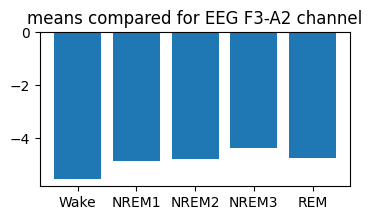

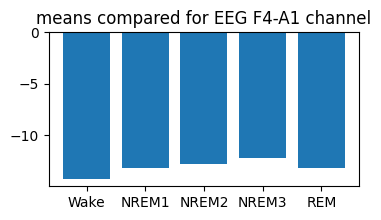

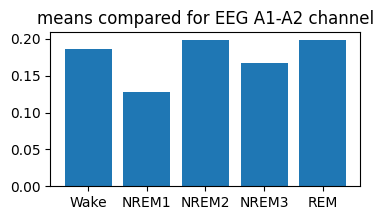

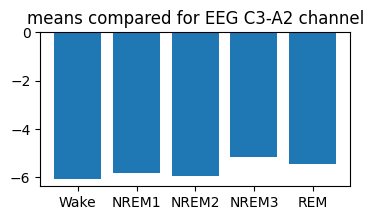

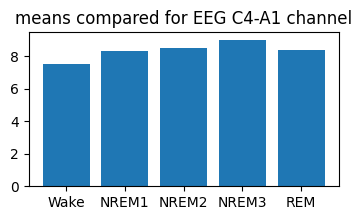

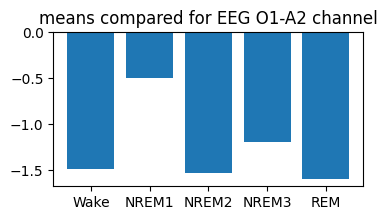

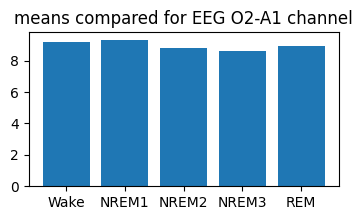

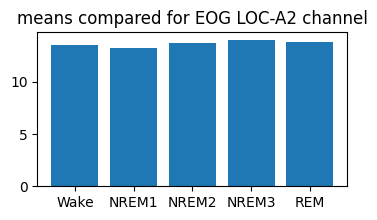

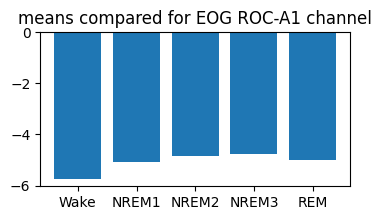

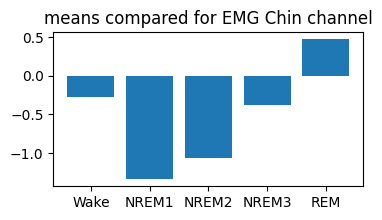

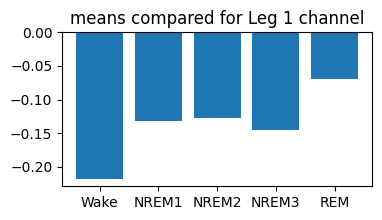

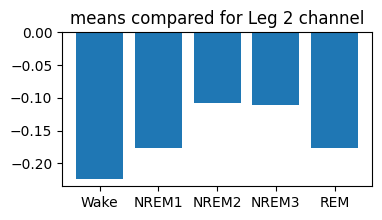

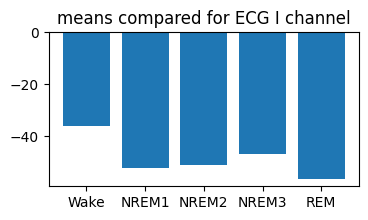

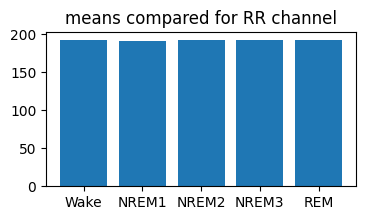

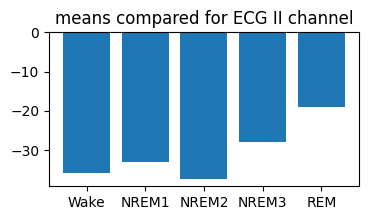

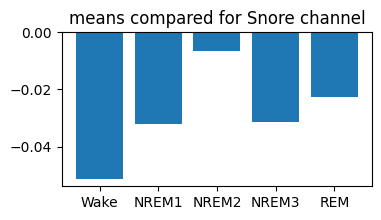

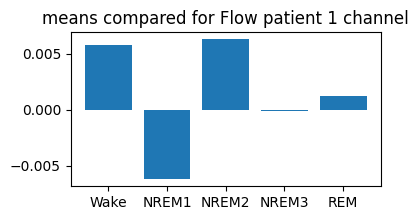

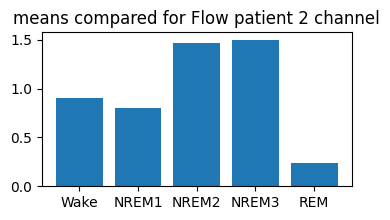

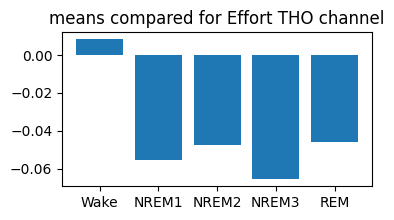

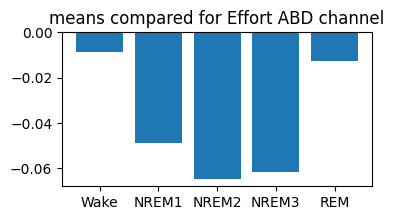

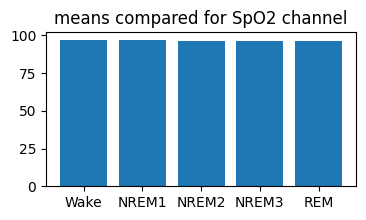

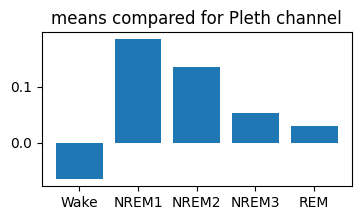

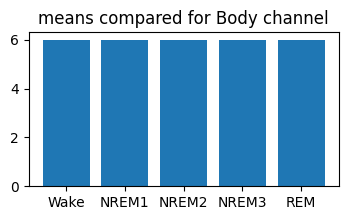

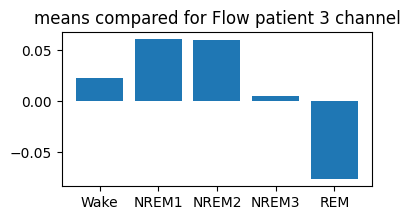

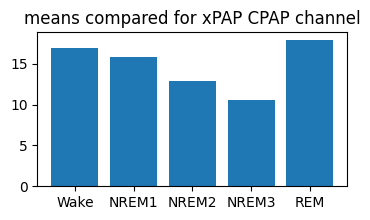

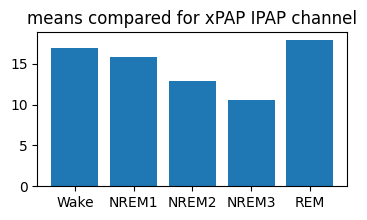

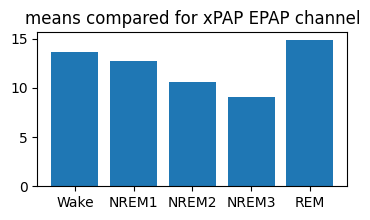

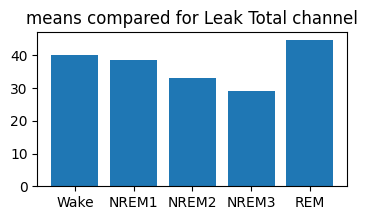

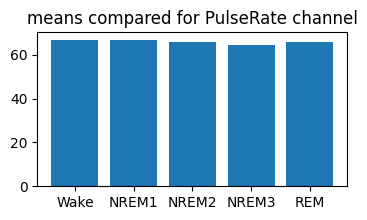

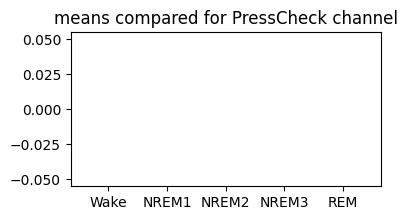

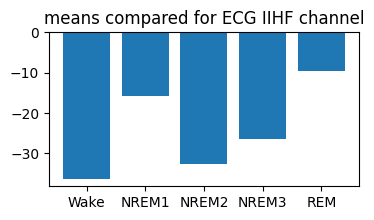

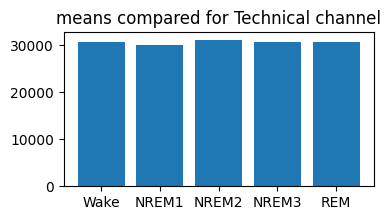

In [130]:
for i in range(len(labels)):
    plot_mean_comparison(total_user_mean_dicts, i)

# machine mean compared

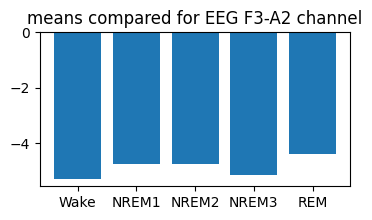

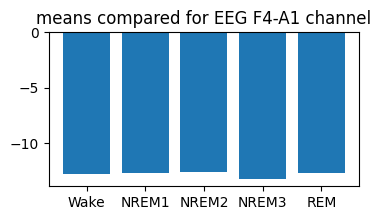

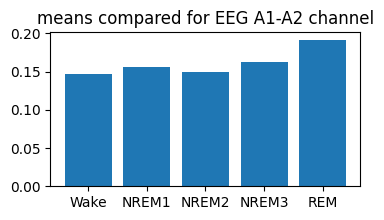

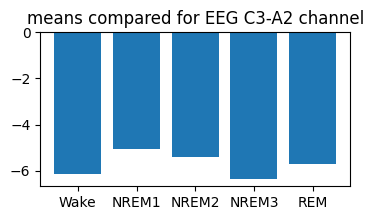

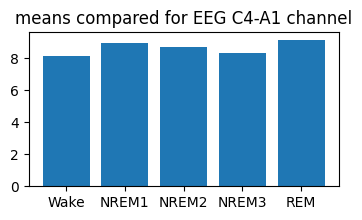

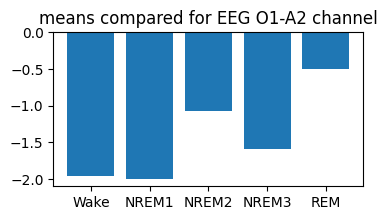

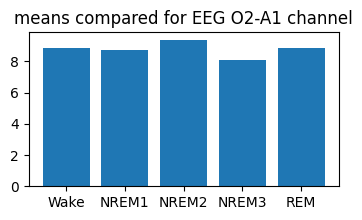

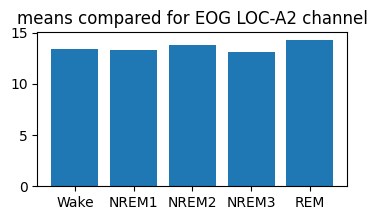

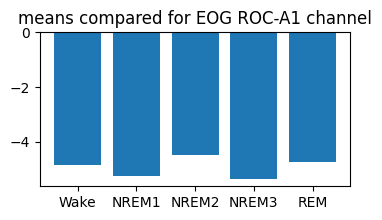

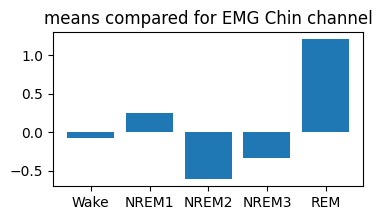

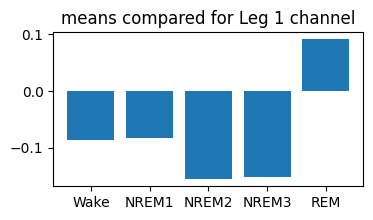

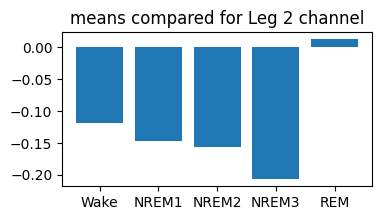

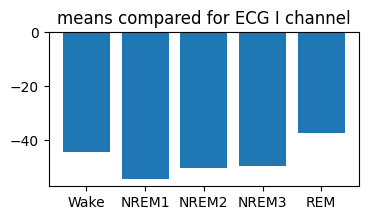

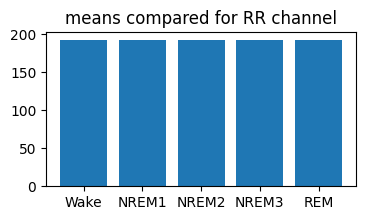

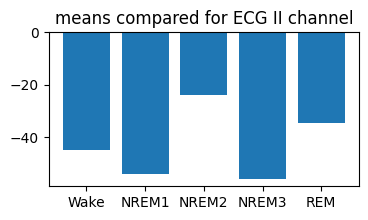

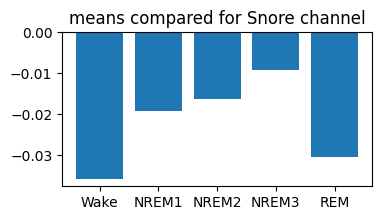

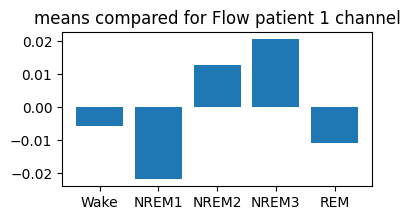

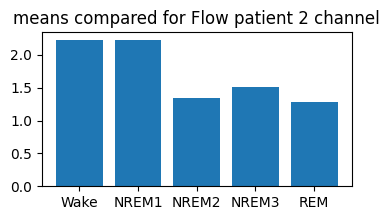

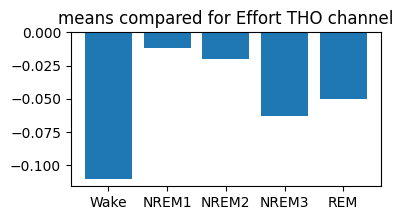

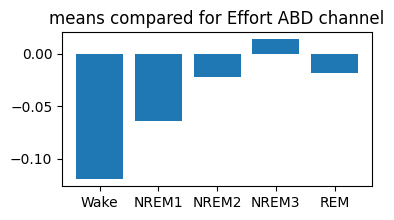

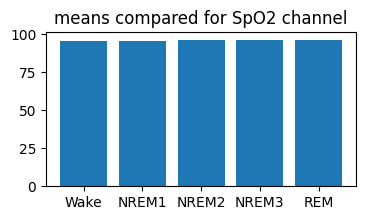

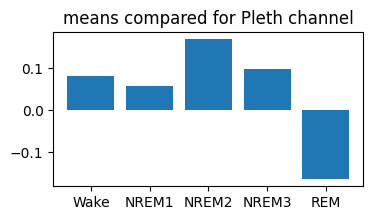

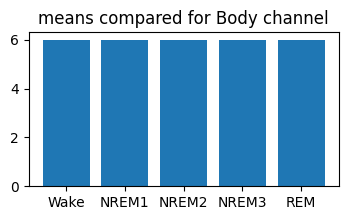

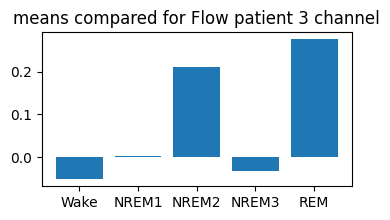

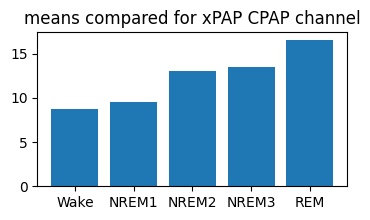

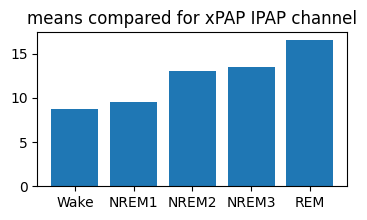

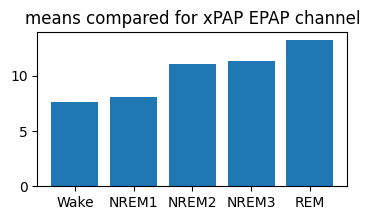

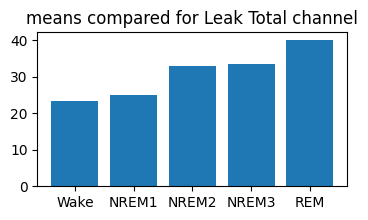

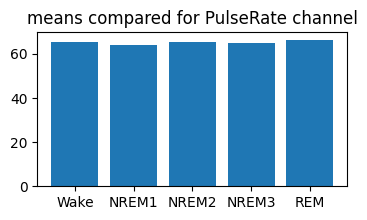

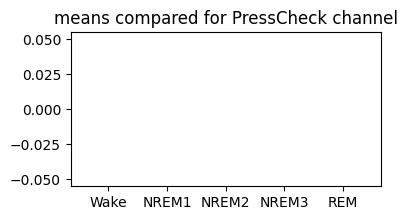

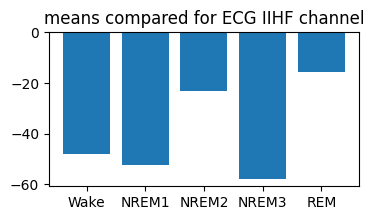

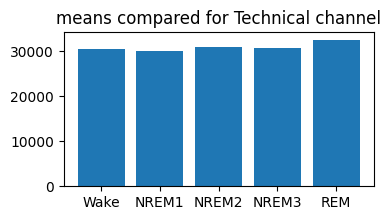

In [141]:
total_machine_mean_dicts = [total_mean_wake_dict_machine, total_mean_nrem1_dict_machine, total_mean_nrem2_dict_machine, total_mean_nrem3_dict_machine, total_mean_rem_dict_machine]
for i in range(len(labels)):
    plot_mean_comparison(total_machine_mean_dicts, i)

# user var compared

In [142]:
total_user_var_dicts = [total_var_wake_dict_user, total_var_nrem1_dict_user, total_var_nrem2_dict_user, total_var_nrem3_dict_user, total_var_rem_dict_user]
def plot_var_comparison(var_dict, index):
    values = []
    for d in var_dict:
        values.append(d[labels[index]])
    categories = ["Wake", "NREM1", "NREM2", "NREM3", "REM"]
    plt.figure(figsize=(4, 2))
    plt.bar(categories, values)
    plt.title(f"vars compared for {labels[index]} channel")
    plt.show()

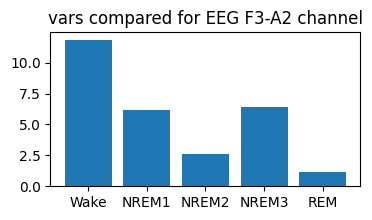

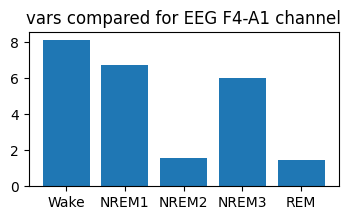

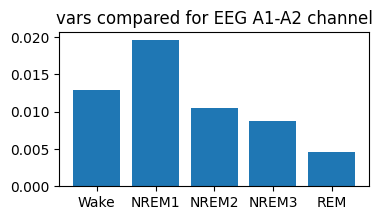

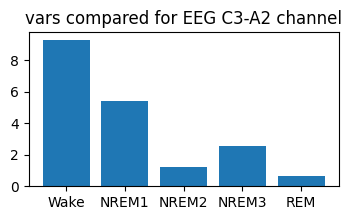

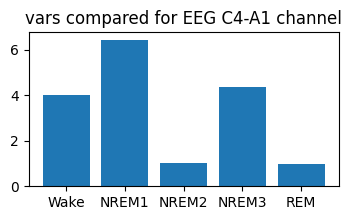

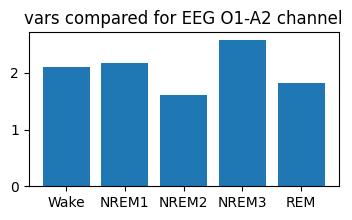

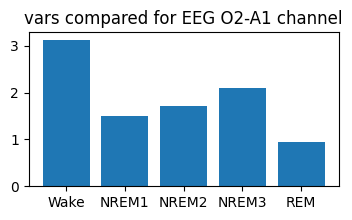

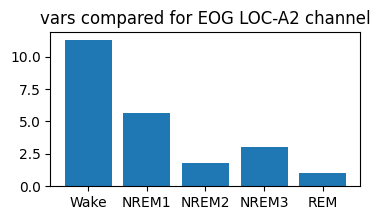

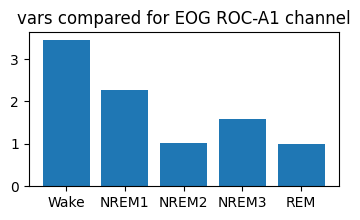

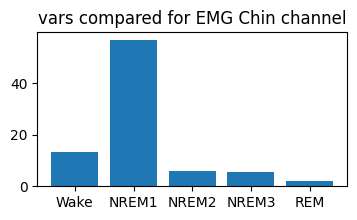

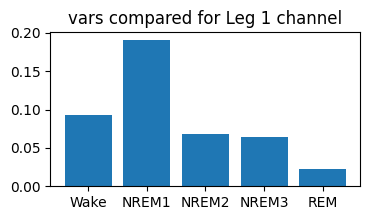

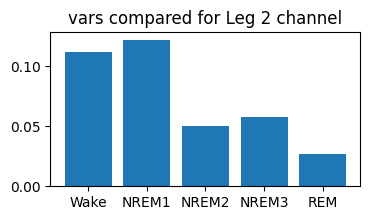

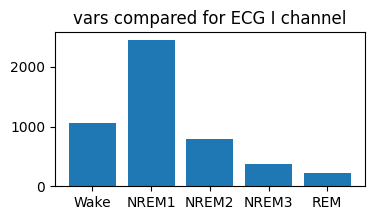

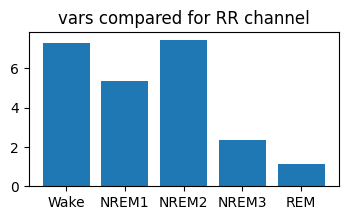

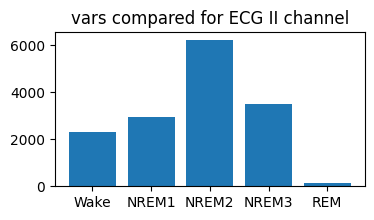

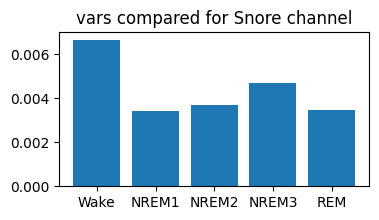

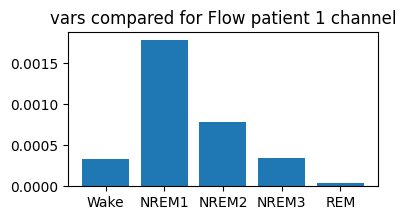

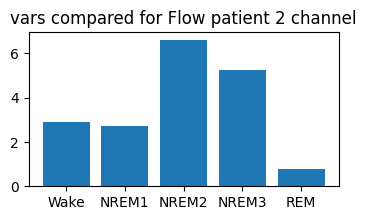

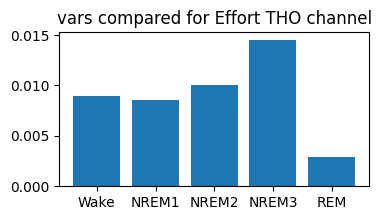

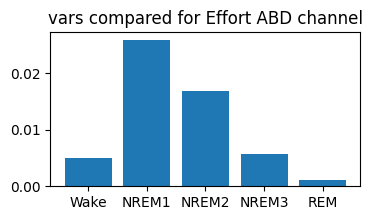

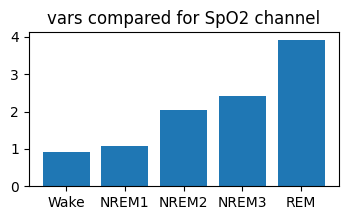

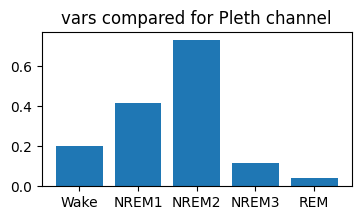

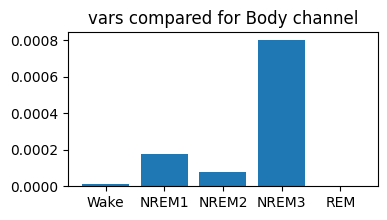

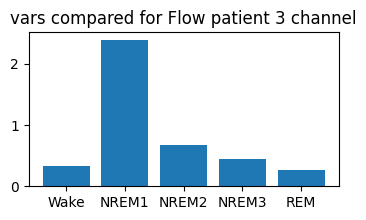

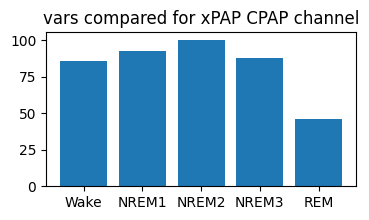

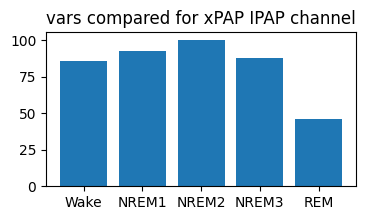

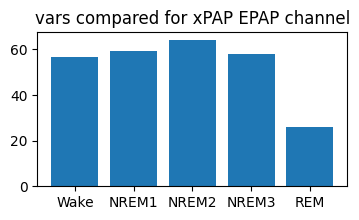

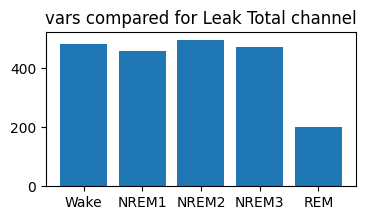

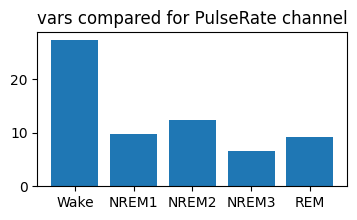

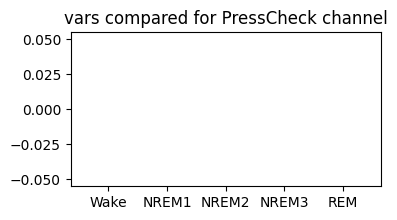

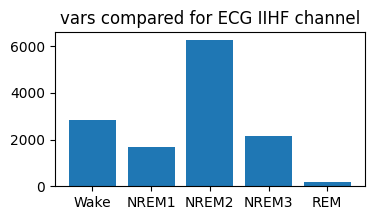

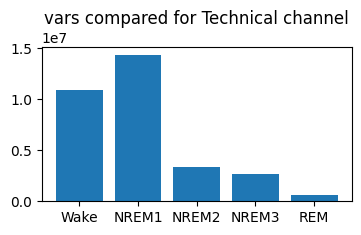

In [143]:
for i in range(len(labels)):
    plot_var_comparison(total_user_var_dicts, i)

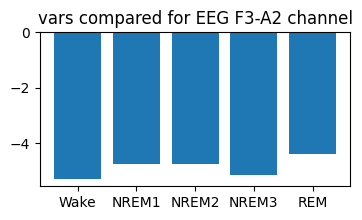

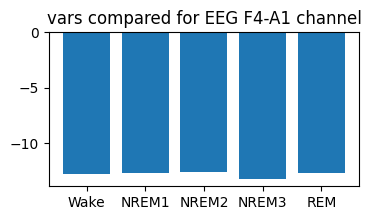

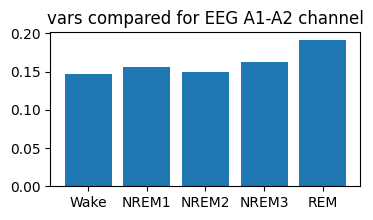

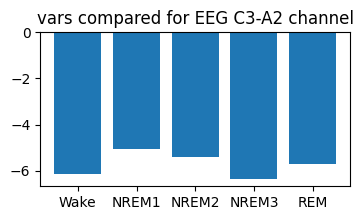

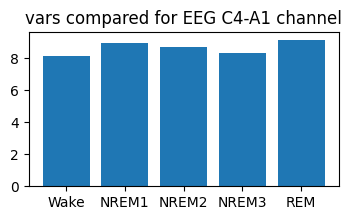

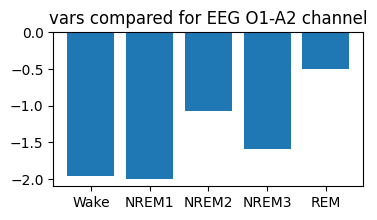

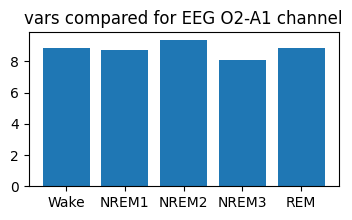

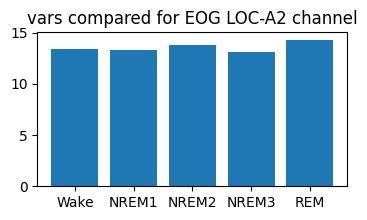

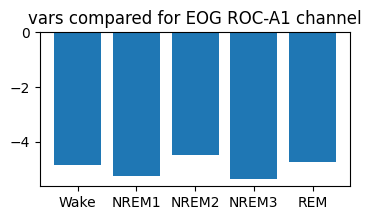

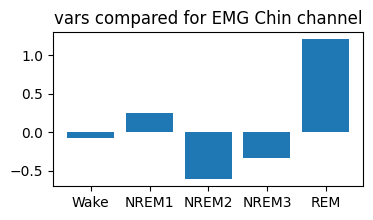

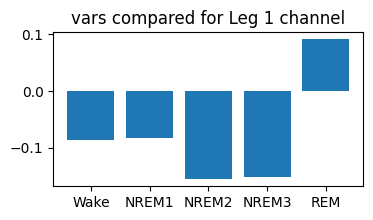

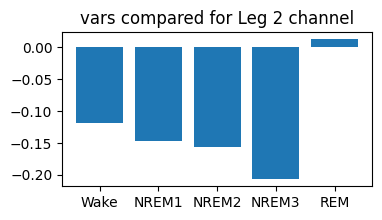

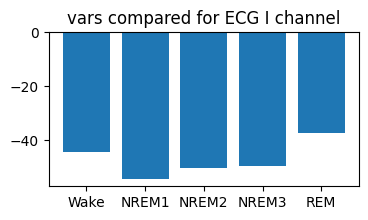

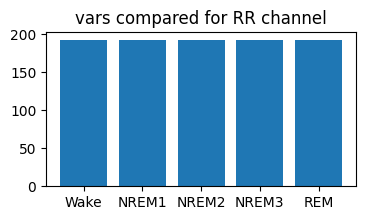

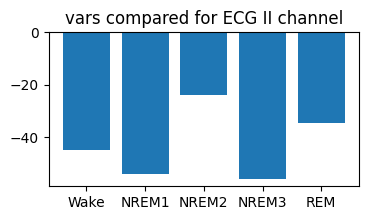

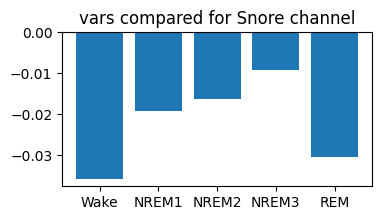

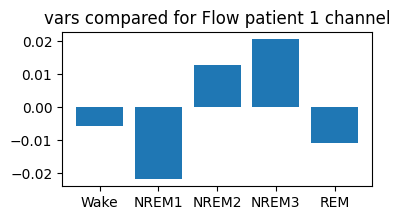

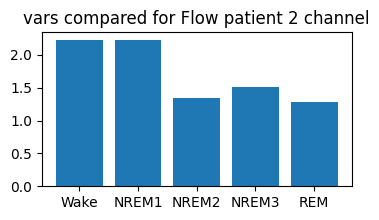

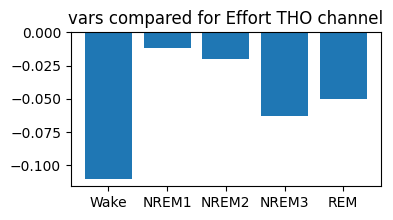

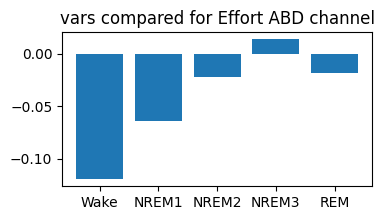

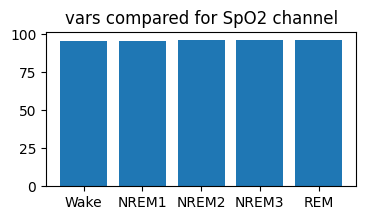

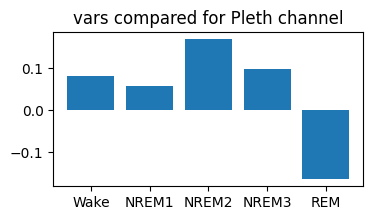

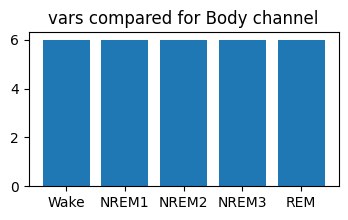

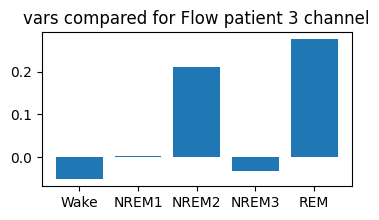

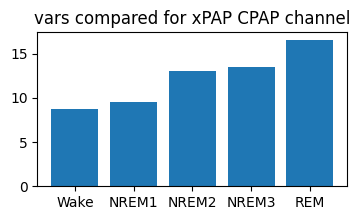

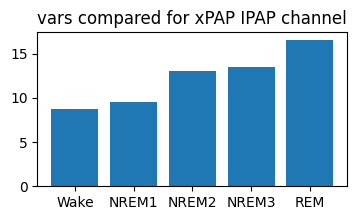

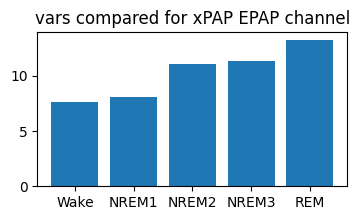

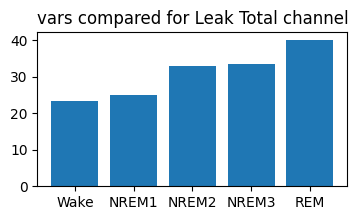

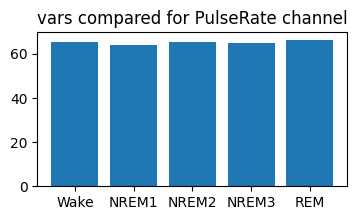

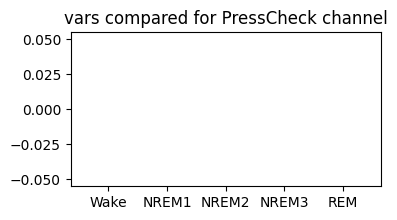

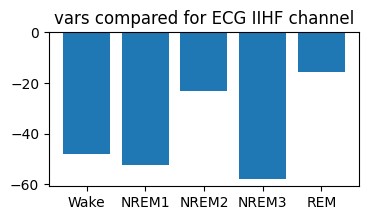

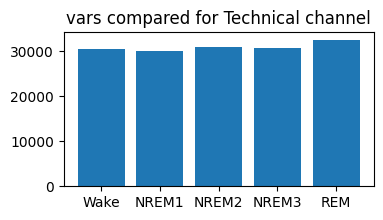

In [145]:
total_machine_mean_dicts = [total_mean_wake_dict_machine, total_mean_nrem1_dict_machine, total_mean_nrem2_dict_machine, total_mean_nrem3_dict_machine, total_mean_rem_dict_machine]
for i in range(len(labels)):
    plot_var_comparison(total_machine_mean_dicts, i)